# Brief introduction to Linear Algebra

In this notebook, I would like to briefly explain

1. Vectors
2. Matrix Operations
3. Transformations, Eigenvectors, and Eigenvalues
4. Eigendecomposition

# 1. Vectors

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import svd,diagsvd

In [2]:
def plot_vectors(x,color=None):
    plt.axis('equal')
    plt.grid()
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

    if color is None:
        plt.quiver(np.zeros(len(x)),np.zeros(len(x)), x[:,0],x[:,1],scale=20)
    else:
        plt.quiver(np.zeros(len(x)),np.zeros(len(x)), x[:,0],x[:,1], color=color,scale=20)
    plt.show()    

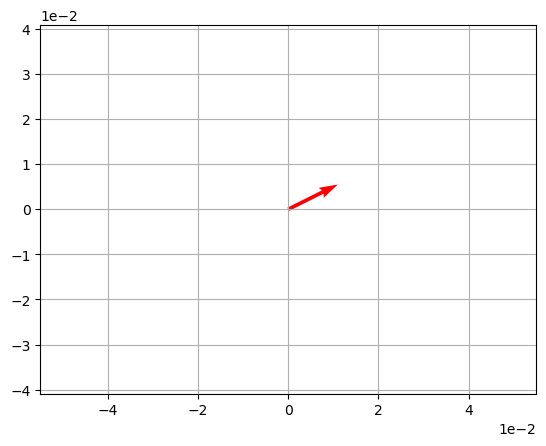

In [3]:
v=np.array([[2,1]])
plot_vectors(v,color='r')

### Calculating Magnitude of a Vector 

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}

### Calculating Direction of a Vector 

Let **v** be a vector (2,1), where *y=2* and *x=1*. The direction of **v** is calculated by arctan 

\begin{equation}tan^{-1} (\frac{1}{2}) \approx 26.57^{o}\end{equation}

In [4]:
v = np.array([2,1])
vTan = v[1] / v[0]
print ('tan = ' + str(vTan))
vAtan = math.atan(vTan)
# atan returns the angle in radians, so convert to degrees
print('inverse-tan = ' + str(math.degrees(vAtan)))
vMag = math.sqrt(v[0]**2 + v[1]**2)
print (vMag)

tan = 0.5
inverse-tan = 26.56505117707799
2.23606797749979


# 1.2 Vector Addition

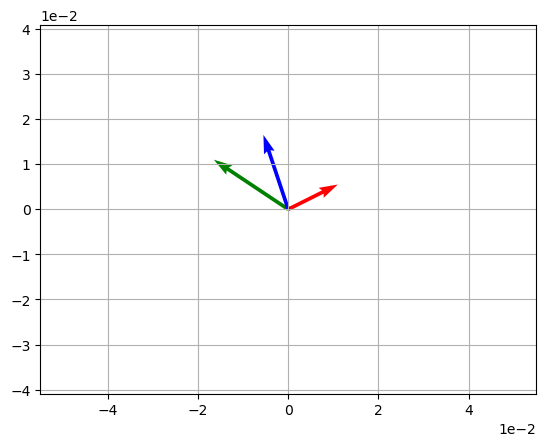

In [5]:
v = np.array([2,1])
s = np.array([-3,2])
vecs = np.array([v,s,v+s])
plot_vectors(vecs,color=['r','g','b'])

# 1.3 Vector Multiplication
Vector multiplication can be performed in three ways:

- Scalar Multiplication
- Dot Product Multiplication
- Cross Product Multiplication

### Scalar Multiplication

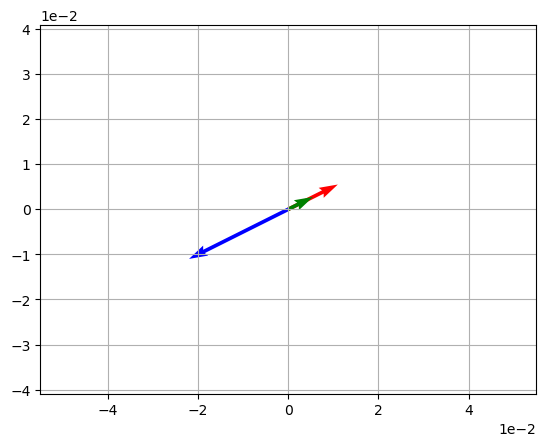

In [6]:
vecs = np.array([v, v*.5, -v*2])

plot_vectors(vecs,color=['r','g','b'])

## Dot Product Multiplication


+ a *scalar product* =>  the *dot product*
+ *vector product* (a vector).

Scalar product is denoted with the &bull; operator:

\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}


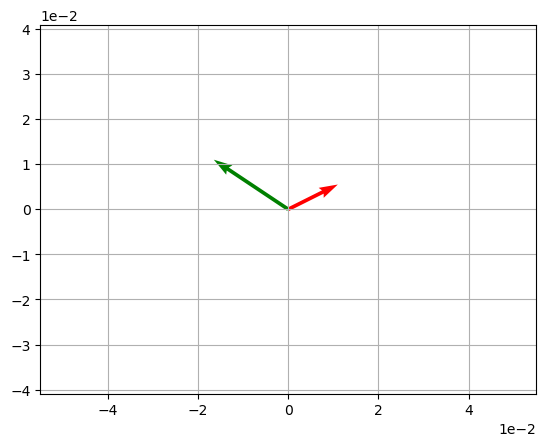

V:[2 1] 	 S:[-3  2], 	 the dot product:-4


In [7]:
vecs = np.array([v, s])
plot_vectors(vecs,color=['r','g'])
print(f'V:{v} \t S:{s}, \t the dot product:{v@s}')

### The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) ,$$ where 

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$



In [8]:
def magnitude(x):
    return ((x**2).sum())**.5

In [9]:
print(f'V:{v} \t S:{s}, \t the dot product:{v@s}')

cosine=(v@s) / ( magnitude(v) * magnitude(s) )

print(f'Cosine (Theta)={cosine}')

# so theta (in degrees) is:
theta=math.degrees(math.acos(cosine))
print(f'Theta:{theta}')

V:[2 1] 	 S:[-3  2], 	 the dot product:-4
Cosine (Theta)=-0.49613893835683387
Theta:119.74488129694222


## Cross Product Multiplication

\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}

To calculate the cross product of these vectors, written as **p** x **q**, we need to create a new vector (let's call it **r**) with three components (r<sub>1</sub>, r<sub>2</sub>, and r<sub>3</sub>). The values for these components are calculated like this:

\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}

So in our case:

\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}


In [10]:
p = np.array([2,3,1])
q = np.array([1,2,-2])
np.cross(p,q)

array([-8,  5,  1])

# 2. Matrix Operations

### 2.1 Matrix Transposition
You can *transpose* a matrix, that is switch the orientation of its rows and columns. You indicate this with a superscript **T**, like this:

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}^{T} = \begin{bmatrix}1 & 4\\2 & 5\\3 & 6 \end{bmatrix}\end{equation}


In [11]:
A = np.array([[1,2,3],
              [4,5,6]])
print(A.T)

[[1 4]
 [2 5]
 [3 6]]


## 2.2 Matrix Multiplication

### Scalar Multiplication
To multiply a matrix by a scalar value, you just multiply each element by the scalar to produce a new matrix:

\begin{equation}2 \times \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix} = \begin{bmatrix}2 & 4 & 6 \\8 & 10 & 12\end{bmatrix}\end{equation}

In Python, you perform this calculation using the **\*** operator:

In [12]:
2*A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

### Dot Product Matrix Multiplication


In [13]:
B = np.array([[9,8],
              [7,6],
              [5,4]])
A @ B

array([[ 38,  32],
       [101,  86]])

## Identity Matrices

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}

In [14]:
A=(np.arange(9)+1).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
A @ np.eye(3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [17]:
np.eye(3) @ A

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

## Matrix Division
You can't actually divide by a matrix; but when you want to divide matrices, you can take advantage of the fact that division by a given number is the same as multiplication by the reciprocal of that number. For example:

\begin{equation}6 \div 3 = \frac{1}{3}\times 6 \end{equation}




# 2.3 Inverse of a Matrix
For matrix division, we use a related idea; we multiply by the *inverse* of a matrix:

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}

The inverse of B is B<sup>-1</sup> as long as the following equation is true:

\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I**, you may recall, is an *identity* matrix; the matrix equivalent of 1.

So how do you calculate the inverse of a matrix? For a 2x2 matrix, you can follow this formula:

\begin{equation}\begin{bmatrix}a & b\\c & d\end{bmatrix}^{-1} = \frac{1}{ad-bc}  \begin{bmatrix}d & -b\\-c & a\end{bmatrix}\end{equation}

What happened there?
- We swapped the positions of *a* and *d*
- We changed the signs of *b* and *c*
- We multiplied the resulting matrix by 1 over the *determinant* of the matrix (*ad-bc*)

In [18]:
A=(np.arange(4)+1).reshape(2,2)

print(f'A:\n{A}',end='\n')
print(f'A^-1:\n{np.linalg.inv(A)}',end='\n')

A:
[[1 2]
 [3 4]]
A^-1:
[[-2.   1. ]
 [ 1.5 -0.5]]


In [19]:
def compute_inv(X):
    X_inverse=np.zeros(X.shape)
    a,b,c,d=X.flatten()
    scalar=1/((a*d) - (b*c))

    return scalar*np.array([[d,-b],
                       [-c,a]])

In [20]:
compute_inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## Example: Solving Systems of Equations with Matrices
One of the great things about matrices, is that they can help us solve systems of equations. For example, consider the following system of equations:

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

We can write this in matrix form, like this:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Note that the variables (***x*** and ***y***) are  arranged as a column in one matrix, which is multiplied by a matrix containing the coefficients to produce as matrix containing the results. If you calculate the dot product on the left side, you can see clearly that this represents the original equations:

\begin{equation}\begin{bmatrix}2x + 4y\\6x + 2y\end{bmatrix} =\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

Now. let's name our matrices so we can better understand what comes next:

\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}

# Why inverse of a matrix is important ?

We already know that 

$$ A \cdot X = B $$
means that

$$ X = A^{-1} \cdot B$$


So, first we need the inverse of A:

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \frac{1}{(2\times2)-(4\times6)}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}= \frac{1}{-20}  \begin{bmatrix}2 & -4\\-6 & 2\end{bmatrix}\end{equation}

\begin{equation}A^{-1}=\begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}


Then we just multiply this with B:

\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}(-0.1 \times 18)+(0.2 \times 34)\\(0.3\times18)+(-0.1\times34)\end{bmatrix}\end{equation}

\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}


In [21]:
A=np.array([[2,4],[6,2]])
B=np.array([[18],[34]])

A_inv=compute_inv(A)
A_inv @ B

array([[5.],
       [2.]])

# 2.4 Covariance Matrix
$$
{\bf X} = \left[ \begin{array}{ccc} 
4.0 & 2.0 & 0.60 \\
4.2 & 2.1 & 0.59 \\
3.9 & 2.0 & 0.58 \\
4.3 & 2.1 & 0.62 \\
4.1 & 2.2 & 0.63   
\end{array} \right]
$$


$$ \mbox{COV} = \frac{\sum_{i=1}^n (X_i - \bar{x})(Y_i - \bar{y})}{n-1} \,$$

In [22]:
X=np.array([[ 4.0 , 2.0, 0.6],
            [ 8.0 , 4.0, 0.3],
            [ 16.0, 8.0, 0.15]])
np.cov(X)

array([[ 2.92  ,  6.56  , 13.48  ],
       [ 6.56  , 14.83  , 30.515 ],
       [13.48  , 30.515 , 62.8075]])

# 3. Transformations, Eigenvectors, and Eigenvalues


## Linear Transformations
In Matrix vector multiplications, matrices act as functions that operate on an input vector to produce a vector output. Hence, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v},$$

where

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$



In [23]:
A=np.array([[2,3],[5,2]])
v=np.array([1,2])

A.shape,v.shape

((2, 2), (2,))

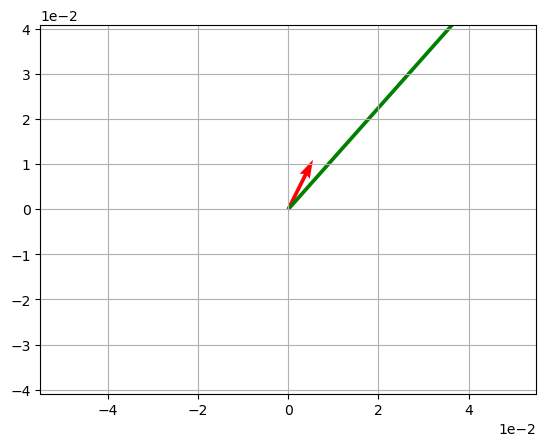

In [24]:
Av=A@v
plot_vectors(np.array([v,Av]),color=['r','g'])

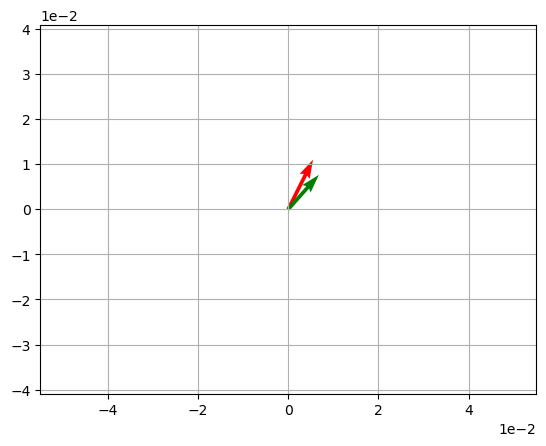

In [25]:


normalized_A=A/magnitude(A)
plot_vectors(np.array([v,normalized_A@v]),color=['r','g'])

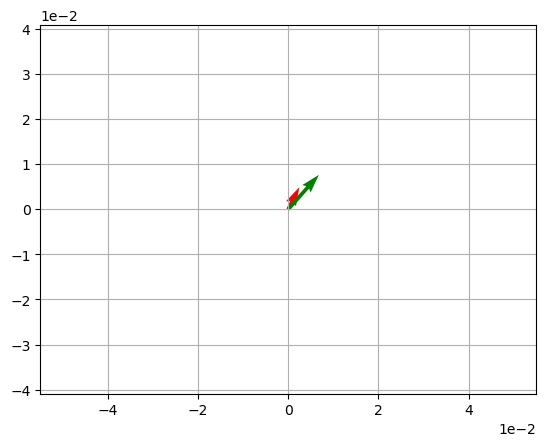

In [26]:

normalized_v=v/magnitude(v)

plot_vectors(np.array([normalized_v,normalized_A@v]),color=['r','g'])

## Transformations of Magnitude and Direction

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in Python:

[2 0]


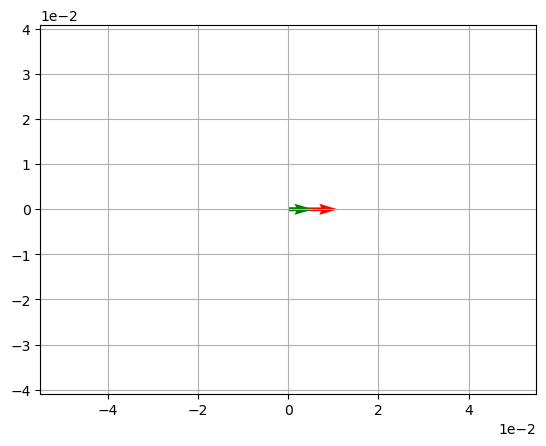

In [27]:

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([t,v])

plot_vectors(vecs,color=['r','g'])


[0 1]


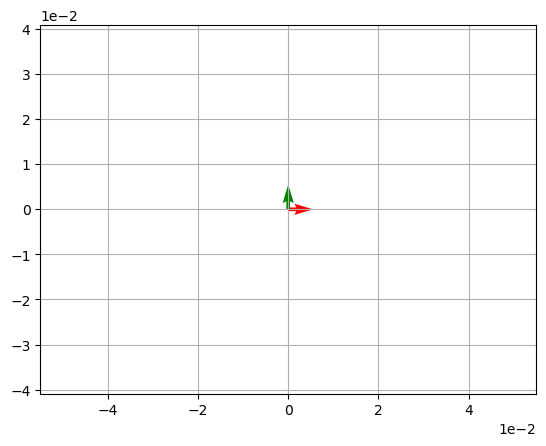

In [28]:
v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


[2 1]


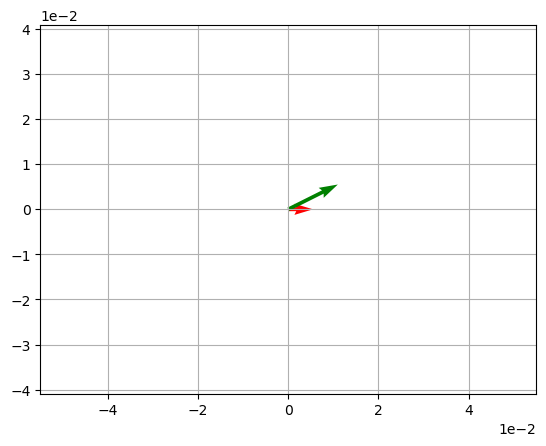

In [29]:
v = np.array([1,0])
A = np.array([[2,1],
              [1,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


### Afine Transformations
An Afine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

This kind of transformation is actually the basis of linear regression, which is a core foundation for machine learning. The matrix defines the *features*, the first vector is the *coefficients*, and the bias vector is the *intercept*.

here's an example of an Afine transformation in Python:

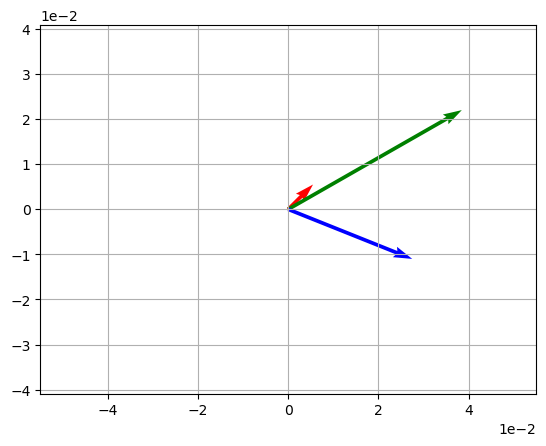

In [30]:
v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

vecs = np.array([v,A@v, A@v + b])
plot_vectors(vecs,color=['r','g','b'])

## Eigenvectors and Eigenvalues
So we can see that when you transform a vector using a matrix, we change its direction, length, or both. When the transformation only affects scale (in other words, the output vector has a different magnitude but the same amplitude as the input vector), the matrix multiplication for the transformation is the equivalent operation as some scalar multiplication of the vector.

For example, earlier we examined the following transformation that dot-mulitplies a vector by a matrix:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

You can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

The following python performs both of these calculation and shows the results, which are identical.

[2 0]
[2 0]


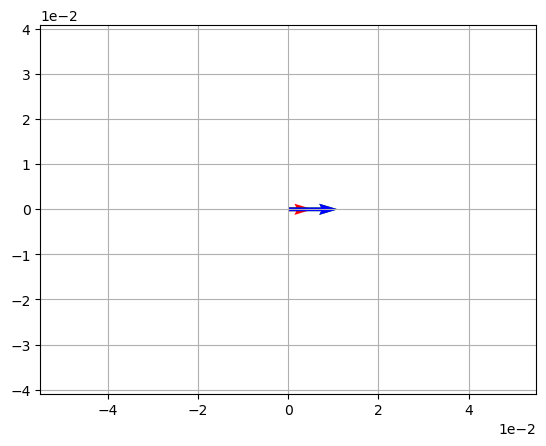

In [31]:
v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t1 = A@v
print (t1)


t2 = 2*v
print (t2)

plot_vectors(np.array([v,t1,t2]),color=['r','g','b'])


In cases like these, where a matrix transformation is the equivelent of a scalar-vector multiplication, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally indicate eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector and the value ***&lambda;*** is an eigenvalue for transformation ***T***.

When the transformation ***T*** is represented as a matrix multiplication, as in this case where the transformation is represented by matrix ***A***:

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

Then  ***v*** is an eigenvector and ***&lambda;*** is an eigenvalue of ***A***.

A matrix can have multiple eigenvector-eigenvalue pairs, and you can calculate them manually. However, it's generally easier to use a tool or programming language. For example, in Python you can use the ***linalg.eig*** function, which returns an array of eigenvalues and a matrix of the corresponding eigenvectors for the specified matrix.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [32]:
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 3, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

Here's the equivalent code in Python, using the ***eVals*** and ***eVecs*** variables you generated in the previous code cell:

In [33]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))

Matrix A:
[[2 0]
 [0 3]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 3.0
v2: [0. 1.]
Av2: [0. 3.]
lam2 x v2: [0. 3.]


Similarly, earlier we examined the following matrix transformation:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

And we saw that you can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

This works because the scalar value 2 and the vector (1,0) are an eigenvalue-eigenvector pair for this matrix.

Let's use Python to determine the eigenvalue-eigenvector pairs for this matrix:

In [34]:
A = np.array([[2,0],
              [0,2]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 2.]
[[1. 0.]
 [0. 1.]]


So once again, there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

Well, we already knew that. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix} $$

Now let's use Pythonto verify and plot these transformations:

In [35]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


Matrix A:
[[2 0]
 [0 2]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [2. 0.]
lam1 x v1: [2. 0.]
-------
lam2: 2.0
v2: [0. 1.]
Av2: [0. 2.]
lam2 x v2: [0. 2.]


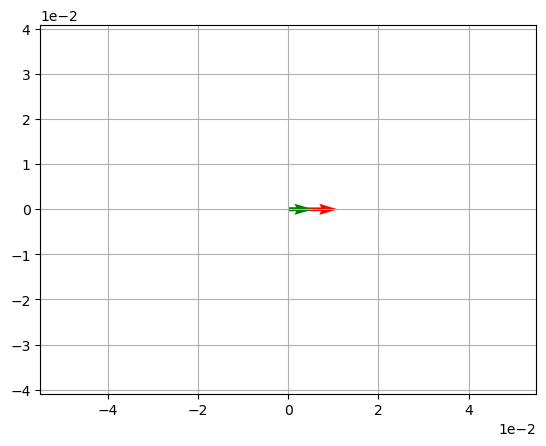

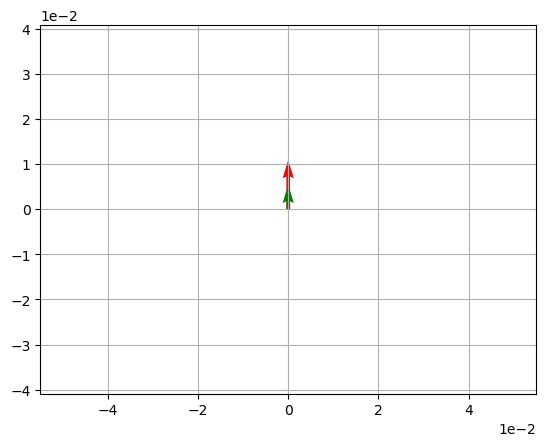

In [36]:
# Plot the resulting vectors
t1 = lam1*vec1
t2 = lam2*vec2
vecs = np.array([t1,vec1])
plot_vectors(vecs,color=['r','g'])

vecs = np.array([t2,vec2])
plot_vectors(vecs,color=['r','g'])


In [37]:
A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to do it with Python:

Matrix A:
[[2 1]
 [1 2]]
-------
lam1: 3.0
v1: [0.70710678 0.70710678]
Av1: [2.12132034 2.12132034]
lam1 x v1: [2.12132034 2.12132034]
-------
lam2: 1.0
v2: [-0.70710678  0.70710678]
Av2: [-0.70710678  0.70710678]
lam2 x v2: [-0.70710678  0.70710678]


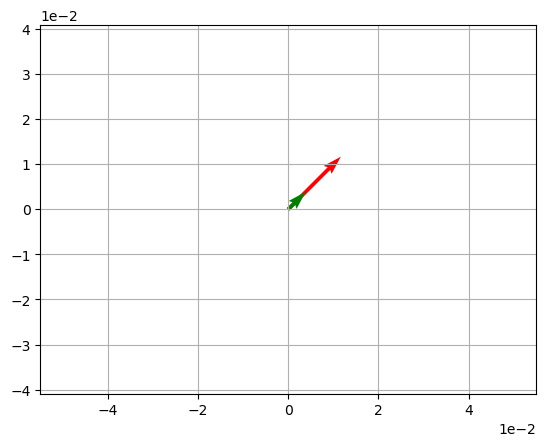

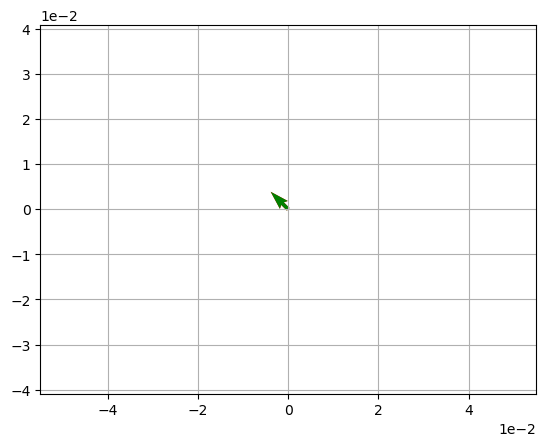

In [38]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the results
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
plot_vectors(vecs,color=['r','g'])

vecs = np.array([t2,vec2])
plot_vectors(vecs,color=['r','g'])

# 4. Eigendecomposition



We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

+ where ***A*** is a trasformation that can be applied to a vector in its current base, 
+ ***Q*** is a matrix of eigenvectors that defines a change of basis, and 
+ ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.


$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

# TODO: Explain how Q etc computed.

In [39]:
A = np.array([[3,2],
              [1,0]])
l, Q = np.linalg.eig(A)
print(Q)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

***&Lambda;*** is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$


In [40]:
L = np.diag(l)
print (L)

[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]


So ***&Lambda;*** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [41]:
Qinv = np.linalg.inv(Q)
print(Qinv)

[[ 0.89720673  0.50382896]
 [-0.27816009  0.99068183]]


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

So what does that mean? Well, it means that we can decompose the transformation of *any* vector multiplied by matrix ***A*** into the separate operations ***Q&Lambda;Q<sup>-1</sup>***:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take vector ***v***:

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Our matrix transformation using ***A*** is:

$$\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix} \cdot \begin{bmatrix}1\\3\end{bmatrix} $$

So let's show the results of that using Python:

[9 1]


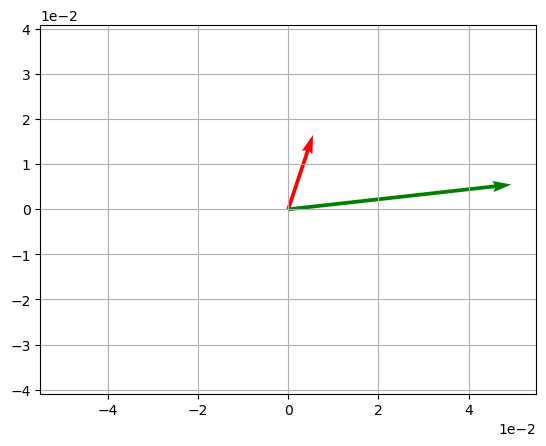

In [42]:
v = np.array([1,3])
t = A@v

print(t)

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])


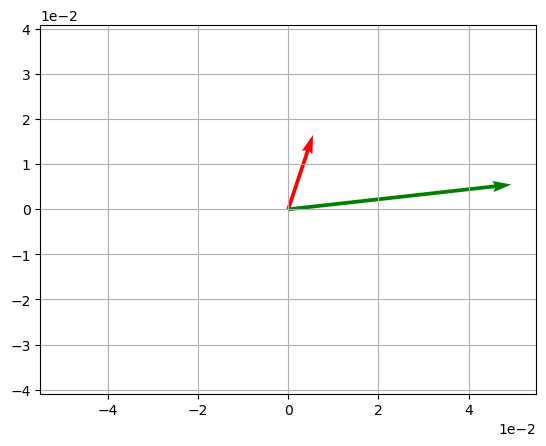

In [43]:


t = (Q@(L@(Qinv)))@v

# Plot v and t
vecs = np.array([v,t])
plot_vectors(vecs,color=['r','g'])

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

In [44]:
t1 = Qinv@v
t2 = L@t1
t3 = Q@t2

# Plot the transformations
vecs = np.array([v,t1, t2, t3])

So from this visualization, it should be apparent that the transformation ***Av*** can be performed by changing the basis for ***v*** using ***Q*** (from orange to red in the above plot) applying the equivalent linear transformation in that base using ***&Lambda;*** (red to magenta), and switching back to the original base using ***Q<sup>-1</sup>*** (magenta to blue).

## Rank of a Matrix

The **rank** of a square matrix is the number of non-zero eigenvalues of the matrix. A **full rank** matrix has the same number of non-zero eigenvalues as the dimension of the matrix. A **rank-deficient** matrix has fewer non-zero eigenvalues as dimensions. The inverse of a rank deficient matrix is singular and so does not exist (this is why in a previous notebook we noted that some matrices have no inverse).

Consider the following matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find its eigenvalues (***&Lambda;***):

In [45]:
A = np.array([[1,2],
              [4,3]])
l, Q = np.linalg.eig(A)
L = np.diag(l)
print(L)

[[-1.  0.]
 [ 0.  5.]]


$$\Lambda=\begin{bmatrix}-1 & 0\\0 & 5\end{bmatrix}$$

This matrix has full rank. The dimensions of the matrix is 2. There are two non-zero eigenvalues. 

Now consider this matrix:

$$B=\begin{bmatrix}3 & -3 & 6\\2 & -2 & 4\\1 & -1 & 2\end{bmatrix}$$

Note that the second and third columns are just scalar multiples of the first column.

Let's examine it's eigenvalues:

In [46]:
B = np.array([[3,-3,6],
              [2,-2,4],
              [1,-1,2]])
lb, Qb = np.linalg.eig(B)
Lb = np.diag(lb)
print(Lb)

[[ 3.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.23364153e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.00567308e-17]]


$$\Lambda=\begin{bmatrix}3 & 0& 0\\0 & -6\times10^{-17} & 0\\0 & 0 & 3.6\times10^{-16}\end{bmatrix}$$

Note that matrix has only 1 non-zero eigenvalue. The other two eigenvalues are so extremely small as to be effectively zero. This is an example of a rank-deficient matrix; and as such, it has no inverse.

## Inverse of a Square Full Rank Matrix
You can calculate the inverse of a square full rank matrix by using the following formula:

$$A^{-1} = Q \Lambda^{-1} Q^{-1}$$

Let's apply this to matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find the matrices for ***Q***, ***&Lambda;<sup>-1</sup>***, and ***Q<sup>-1</sup>***:

In [47]:
A = np.array([[1,2],
              [4,3]])

l, Q = np.linalg.eig(A)
L = np.diag(l)
print(Q)
Linv = np.linalg.inv(L)
Qinv = np.linalg.inv(Q)
print(Linv)
print(Qinv)

[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]
[[-1.  -0. ]
 [ 0.   0.2]]
[[-0.94280904  0.47140452]
 [-0.74535599 -0.74535599]]


So:

$$A^{-1}=\begin{bmatrix}-0.70710678 & -0.4472136\\0.70710678 & -0.89442719\end{bmatrix}\cdot\begin{bmatrix}-1 & -0\\0 & 0.2\end{bmatrix}\cdot\begin{bmatrix}-0.94280904 & 0.47140452\\-0.74535599 & -0.74535599\end{bmatrix}$$

Let's calculate that in Python:

In [48]:
Ainv = (Q@(Linv@(Qinv)))
print(Ainv)

[[-0.6  0.4]
 [ 0.8 -0.2]]


That gives us the result:

$$A^{-1}=\begin{bmatrix}-0.6 & 0.4\\0.8 & -0.2\end{bmatrix}$$

We can apply the ***np.linalg.inv*** function directly to ***A*** to verify this:

In [49]:
print(np.linalg.inv(A))

[[-0.6  0.4]
 [ 0.8 -0.2]]


# Singular Value Decomposition

In [50]:
#generate the data 
X = np.array([[0,0,1,1,1,0,0,0,0,0],
             [1,0,1,1,0,1,0,0,1,0],
             [0,0,0,0,0,0,1,1,0,1],
             [1,1,1,0,1,0,0,0,0,0],
             [1,1,1,1,1,0,0,0,0,0],
             [0,0,1,1,1,0,0,0,1,0],
             [1,1,1,1,0,0,0,0,0,0],
             [0,0,0,1,0,1,0,1,1,1]])
X.shape

(8, 10)

In [51]:
#SVD Calculation
U, s, Vh = svd(X)

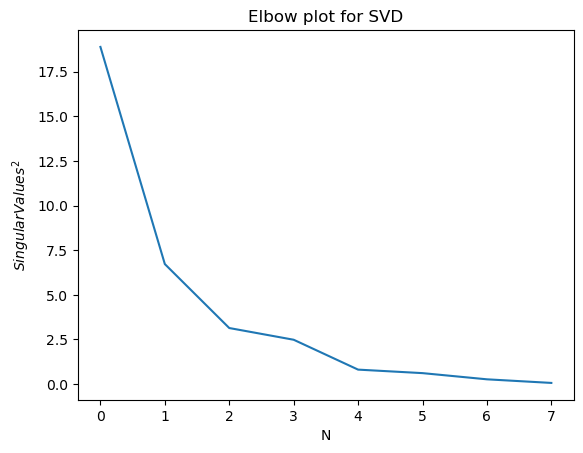

In [52]:
plt.plot(s**2)
plt.xlabel('N')
plt.ylabel('$Singular Values^2$')
plt.title('Elbow plot for SVD')
plt.show()

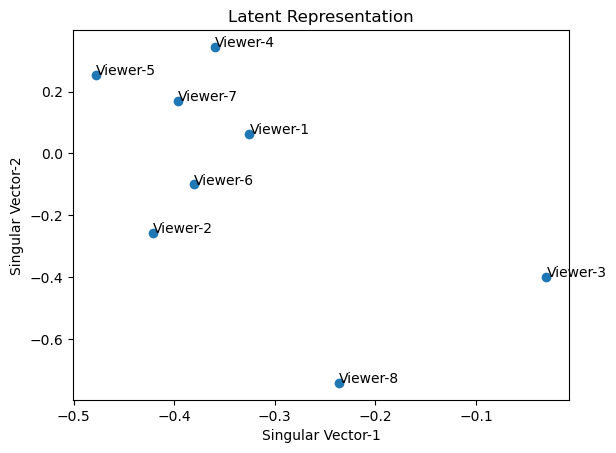

In [53]:
plt.scatter(U[:,0],U[:,1])
for i,name in enumerate(['Viewer-1','Viewer-2','Viewer-3','Viewer-4','Viewer-5','Viewer-6','Viewer-7','Viewer-8']):
    plt.annotate(name,(U[i,0],U[i,1]))
plt.xlabel('Singular Vector-1')
plt.ylabel('Singular Vector-2')
plt.title('Latent Representation')
plt.show()

In [54]:
#truncate to only first few singular values
s[4:]=0

In [55]:
#calculate estimate using truncated S
out_score = np.dot(np.dot(U,diagsvd(s,8,10)),Vh)
#show results
print("X=\n.{}".format(X))
print("U={}".format((U[:1,:].round(1))))
print("V=\n{}".format(Vh[:,:1].round(1)))
print("Score=\n.{}".format(out_score))
print("Reconstructed-X=\n.{}".format(np.round(out_score)))

X=
.[[0 0 1 1 1 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 1 0 1]
 [1 1 1 0 1 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 1 1]]
U=[[-0.3  0.1  0.2 -0.5  0.3 -0.1  0.6  0.3]]
V=
[[-0.4]
 [ 0.2]
 [-0.2]
 [ 0.5]
 [-0.2]
 [-0.1]
 [ 0.1]
 [-0.4]
 [ 0.5]
 [ 0.1]]
Score=
.[[ 0.04617607  0.13424659  0.90155657  0.80904016  1.08909287 -0.10131373
   0.00178218 -0.01146103  0.33989904 -0.01146103]
 [ 0.85755057  0.24667006  0.833104    1.18902275 -0.02676863  0.91670222
  -0.25609555  0.04972616  0.98032617  0.04972616]
 [-0.07490512  0.18119043 -0.163318    0.04154119  0.10063693  0.06511688
   0.73284046  1.05405289 -0.02507818  1.05405289]
 [ 0.92169354  0.97179058  0.97125888  0.45296099  0.74685223 -0.20282477
   0.11635324 -0.0363745  -0.23253264 -0.0363745 ]
 [ 0.98194855  0.93417357  1.22986704  0.83167816  0.91856706 -0.01869716
   0.07269657  0.00622443  0.07478216  0.00622443]
 [-0.01053514 -0.07415909  0.97446354  1.1163549

In [56]:
### To reconstruc original data X we only need 4 of the singilar values
np.all(X==np.round(out_score))

True